In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

churn_data = pd.read_csv("ChurnModeling_1.csv") 

In [68]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Removing columns with unique value that does not add value to the model

In [69]:
churn_data.drop(['Surname','CustomerId'],inplace=True,axis=1)

In [64]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Categorical value encoding

In [70]:
churn_enc = pd.get_dummies(churn_data)

In [71]:
churn_enc

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


Train-Test split before standardising the data

In [73]:
X=churn_enc.drop('Exited',axis=1)
# Specify the target labels and flatten the array
y= np.ravel(churn_data.Exited)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [74]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9217,644,31,5,0.00,2,1,1,41872.17,1,0,0,0,1
2608,600,32,1,0.00,1,1,1,101986.16,1,0,0,0,1
4325,567,45,1,157320.51,1,1,0,62193.92,0,0,1,1,0
1876,640,39,9,131607.28,4,0,1,6981.43,0,1,0,0,1
1764,611,40,1,0.00,2,1,1,102547.56,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,624,35,0,180303.24,2,1,0,163587.90,0,1,0,1,0
4644,712,74,5,0.00,2,0,0,151425.82,0,0,1,0,1
8942,667,37,9,71786.90,2,1,1,67734.79,1,0,0,1,0
2935,687,35,8,100988.39,2,1,0,22247.27,0,0,1,0,1


In [79]:
X_train.shape

(6700, 13)

Synthetic Minority Oversampling Technique(SMOTE)-oversampling the minority class to address class imbalance

In [49]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 5) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Using TensorFlow backend.


After OverSampling, the shape of train_X: (10670, 13)
After OverSampling, the shape of train_y: (10670,) 

After OverSampling, counts of label '1': 5335
After OverSampling, counts of label '0': 5335


In [59]:
X_train_res.shape

(10670, 13)

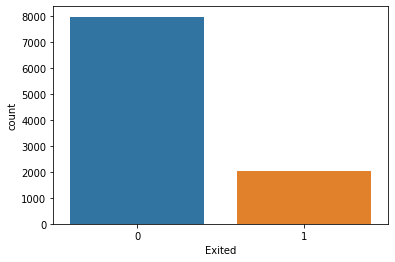

In [84]:
sns.countplot(x='Exited',data=churn_data)

Text(0, 0.5, 'Count')

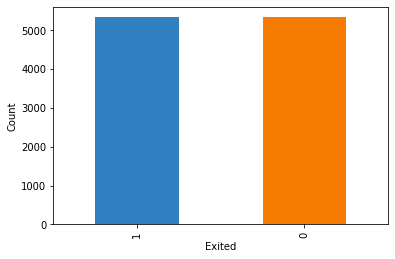

In [99]:
pd.value_counts(y_train_res).plot.bar(color=['#307FC1','#f57c00'])
pd.value_counts(y_train_res)
plt.xlabel('Exited')
plt.ylabel('Count')